<a href="https://colab.research.google.com/github/rmhyps1/statistics/blob/main/PROGRES_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Baca file CSV
data = pd.read_csv('/content/Most Streamed Spotify Songs 2024.csv', encoding='latin-1')

# Tampilkan 5 baris pertama
data.head()

# Lihat semua kolom
print(data.columns)


Index(['Track', 'Album Name', 'Artist', 'Release Date', 'ISRC',
       'All Time Rank', 'Track Score', 'Spotify Streams',
       'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins',
       'Deezer Playlist Count', 'Deezer Playlist Reach',
       'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Soundcloud Streams', 'Shazam Counts', 'TIDAL Popularity',
       'Explicit Track'],
      dtype='object')


=== PARAMETER DISTRIBUSI NORMAL ===
Rata-rata (μ): 447,387,314.75
Simpangan baku (σ): 538,443,905.28

=== HASIL PERHITUNGAN PELUANG ===
Peluang lagu memiliki < 10,000,000 streams = 0.2083


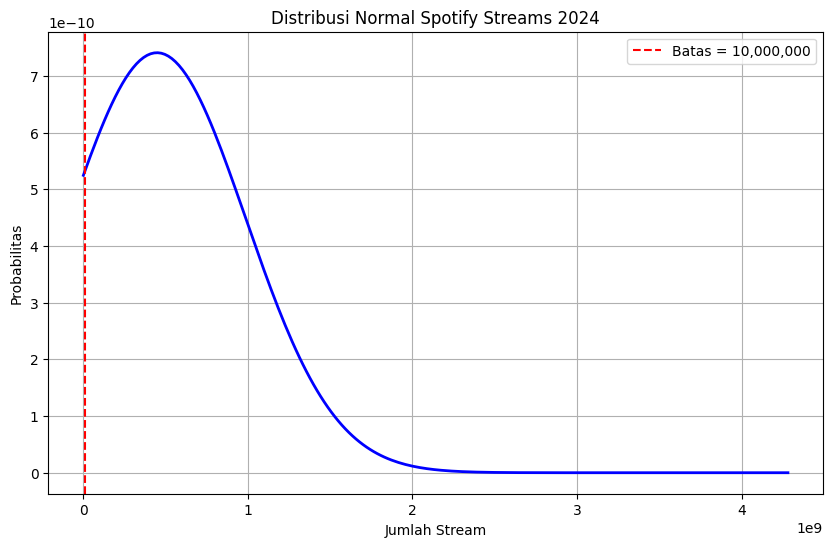


=== PELUANG DALAM RENTANG ===
Peluang lagu punya streams antara 5,000,000 dan 50,000,000 = 0.0246


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# baca file
file_path = '/content/Most Streamed Spotify Songs 2024.csv'
data = pd.read_csv(file_path, encoding='latin-1')

# ubah kolom 'Spotify Streams' jadi angka
data['Spotify Streams'] = (
    data['Spotify Streams']
    .astype(str)
    .replace({',': '', 'M': 'e6', 'B': 'e9'}, regex=True)
    .astype(float)
)

# hitung rata-rata dan simpangan baku
mu = data['Spotify Streams'].mean()
sigma = data['Spotify Streams'].std()

print("=== PARAMETER DISTRIBUSI NORMAL ===")
print(f"Rata-rata (μ): {mu:,.2f}")
print(f"Simpangan baku (σ): {sigma:,.2f}")

# peluang lagu dengan <10 juta streams
batas = 10_000_000
peluang = norm.cdf(batas, mu, sigma)

print("\n=== HASIL PERHITUNGAN PELUANG ===")
print(f"Peluang lagu memiliki < {batas:,} streams = {peluang:.4f}")

# visualisasi distribusi normal
x = np.linspace(data['Spotify Streams'].min(), data['Spotify Streams'].max(), 200)
y = norm.pdf(x, mu, sigma)

plt.figure(figsize=(10,6))
plt.plot(x, y, color='blue', lw=2)
plt.axvline(batas, color='red', linestyle='--', label=f'Batas = {batas:,}')
plt.title('Distribusi Normal Spotify Streams 2024')
plt.xlabel('Jumlah Stream')
plt.ylabel('Probabilitas')
plt.legend()
plt.grid(True)
plt.show()

# peluang dalam rentang 5 juta–50 juta
bawah, atas = 5_000_000, 50_000_000
peluang_rentang = norm.cdf(atas, mu, sigma) - norm.cdf(bawah, mu, sigma)

print("\n=== PELUANG DALAM RENTANG ===")
print(f"Peluang lagu punya streams antara {bawah:,} dan {atas:,} = {peluang_rentang:.4f}")